In [ ]:
import torch;
import torch.nn as nn;
import matplotlib.pyplot as plt;

In [2]:
x = torch.arange(0,1,0.1).unsqueeze(1)
y = x **2 #Parabola 

In [11]:
model = nn.Sequential(
    nn.Linear(1,16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [13]:
# Training loop 
echloes = 200
for echlo in range(echloes):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if echlo % 20 ==0:
        print(echlo,loss.item())

0 0.5916565656661987
20 0.2547956109046936
40 0.23432233929634094
60 0.21428906917572021
80 0.19649162888526917
100 0.17851169407367706
120 0.15972337126731873
140 0.14008647203445435
160 0.11853472143411636
180 0.09954141080379486


In [16]:
for name, params in model.named_parameters():
    print(name,params.data)

0.weight tensor([[ 0.5154],
        [ 0.2758],
        [ 0.0060],
        [ 0.9394],
        [-0.1783],
        [-0.9133],
        [-0.7856],
        [-0.1536],
        [-0.4928],
        [-0.7217],
        [ 0.1467],
        [ 0.8561],
        [ 0.3427],
        [ 0.2057],
        [-0.6479],
        [ 0.0946]])
0.bias tensor([ 0.7175,  0.5911, -0.6563,  0.4032,  0.4212,  0.7960,  0.0386, -0.2700,
        -0.6268, -0.6038,  0.9138,  0.3161, -0.6191, -0.8756,  0.7274,  0.8847])
2.weight tensor([[-0.0629, -0.1635, -0.1528, -0.0605, -0.0222,  0.0279, -0.2123, -0.2007,
         -0.0258,  0.0681,  0.1368,  0.2462,  0.2239,  0.0007, -0.0641,  0.2545],
        [-0.0449,  0.1626,  0.0151, -0.1701, -0.1012,  0.1001, -0.1149,  0.0904,
          0.1099, -0.0092,  0.2344,  0.0643, -0.1214,  0.0114,  0.0261, -0.2364],
        [-0.1809,  0.2353,  0.0861, -0.0959,  0.1965, -0.1157, -0.1510,  0.1520,
         -0.1482,  0.0643, -0.0421, -0.1896,  0.1872, -0.1256, -0.0574, -0.0004],
        [ 0.2180, -0

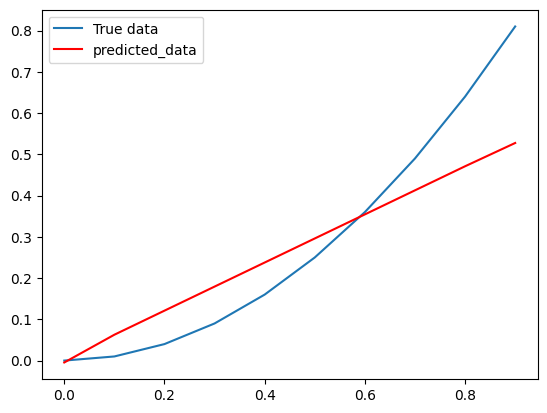

In [19]:
model.eval()
with torch.inference_mode():
    y_pred = model(x)

plt.plot(x , y , label = "True data")
with torch.inference_mode():
    y_pred = model(x)

plt.plot( x , y_pred , color = "red" , label = "predicted_data")
plt.legend()
plt.show()